# Day 08. Exercise 04
# Regression

## 0. Imports

In [753]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [754]:
df = pd.read_csv('../data/checker_regression.csv')
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,NaN
1,user_1,62,28.0,NaN
2,user_1,62,28.0,NaN
3,user_1,62,28.0,NaN
4,user_1,62,28.0,NaN
...,...,...,...,...
72,user_31,128,NaN,-104.75
73,user_4,40,NaN,-175.60
74,user_6,15,NaN,-62.60
75,user_7,8,NaN,-115.50


In [755]:
df = df.fillna(0)
df = df.drop_duplicates()
df = df.set_index('uid')
df

,num_commits,pageviews,AVG(diff)
uid,,,
user_1,62,28.0,0.000000
user_10,20,89.0,0.000000
user_11,7,0.0,-2.000000
user_12,86,0.0,-89.000000
user_13,52,0.0,-48.500000
user_14,61,143.0,0.000000
user_15,23,0.0,-17.500000
user_16,41,0.0,-39.333333
user_17,51,47.0,0.000000


In [756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, user_1 to user_8
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_commits  29 non-null     int64  
 1   pageviews    29 non-null     float64
 2   AVG(diff)    29 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 928.0+ bytes


In [757]:
X = df[['num_commits', 'pageviews']]
y = df['AVG(diff)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [758]:
def crossval(n_splits: int, X, y, model):
  kf = KFold(n_splits=n_splits, random_state=21, shuffle=True)
  test_rmse_scores = []

  for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = mean_squared_error(y_train, y_train_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred)

    test_rmse_scores.append(test_rmse)

    print(f"train - {train_rmse}\t|\ttest - {test_rmse}")
  
  avg_test_rmse = np.mean(test_rmse_scores)
  print(f"Average RMSE on crossval is {avg_test_rmse}")

In [759]:
logreg = LinearRegression(fit_intercept=False)
crossval(5, X, y, logreg)

train - 5544.848952342979	|	test - 4048.865640891234
train - 5204.6532075469595	|	test - 6959.456897302232
train - 4649.6909233678125	|	test - 7230.333674693985
train - 5578.545199784699	|	test - 4874.020350171432
train - 4499.825614389542	|	test - 8558.063049828466
Average RMSE on crossval is 6334.147922577469


In [760]:
dtr = DecisionTreeRegressor(random_state=21, max_depth=5)
crossval(5, X, y, dtr)

train - 212.4015760869565	|	test - 10205.774259259259
train - 684.7118695652174	|	test - 3119.438703703703
train - 130.115	|	test - 4256.439907407408
train - 477.19073369565217	|	test - 1589.522734375
train - 473.49355324074077	|	test - 9799.251069444446
Average RMSE on crossval is 5794.085334837963


In [761]:
rfr = RandomForestRegressor(random_state=21, max_depth=5, n_estimators=100)
crossval(5, X, y, rfr)

train - 401.62927271722367	|	test - 7549.075031364661
train - 828.5892324947639	|	test - 1606.6016775220767
train - 615.168741221932	|	test - 4022.3847737888304
train - 739.401643564438	|	test - 1666.3686331230763
train - 757.4203140833924	|	test - 6149.580215704014
Average RMSE on crossval is 4198.802066300532


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [762]:
pred_df = pd.DataFrame({
  'AVG(diff)': y_test,
  'Logreg': logreg.predict(X_test),
  'Decision Tree': dtr.predict(X_test),
  'Random Forest': rfr.predict(X_test)
})
pred_df

,AVG(diff),Logreg,Decision Tree,Random Forest
uid,,,,
user_22,-141.4,-4.394980,-141.400000,-94.541278
user_29,-157.4,-44.828793,-147.300000,-139.500263
user_15,-17.5,-20.216907,-34.441667,-29.500609
user_7,-115.5,-7.031968,-115.500000,-86.875135
user_2,-137.2,-40.433814,-147.300000,-120.546446
user_28,0.0,-20.384712,0.000000,0.000000


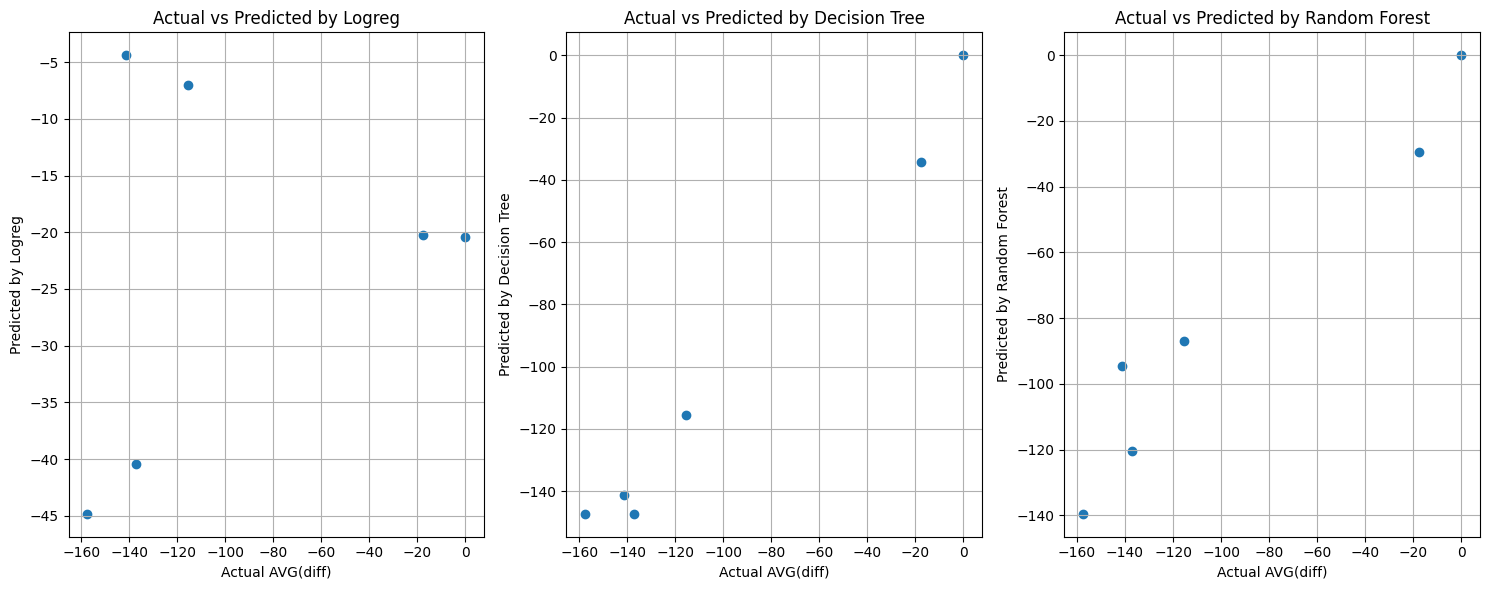

In [764]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(pred_df.columns[1:]):
  plt.subplot(1, 3, i+1)
  plt.scatter(pred_df['AVG(diff)'], pred_df[col])
  plt.xlabel('Actual AVG(diff)')
  plt.ylabel(f'Predicted by {col}')
  plt.grid()
  plt.title(f'Actual vs Predicted by {col}')
plt.tight_layout()
plt.show()

- Ideally the graph is **diagonal**